In [1]:
#imports and setup
import requests
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from datetime import datetime, timedelta
token = 'FF0D4AB80BDB63716462F02BB9291897'
from functions import *
from process_tests import *
import os
import json
import subprocess
import time
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf
import ctypes
def var_name(my_var):
    my_var_name = [ k for k,v in globals().items() if v is my_var][0]


I've decided to make the functions in a seperate Python file for readability.

Lets start with getting the unique IDs for all participants...

In [2]:
listOfParticipantIds(token)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']

Here we can see that this function gives us back a list of all of the participant IDs in our record. Lets now try to get a general overview of our data by getting the participant ID and type of experiment for each recorded test. The data is by default given in this way, with each test being a seperate entry, and its worth noting that the same participant can have multiple entries for the same test.

In [3]:
raw = allTestsOverview(token)
# print(raw) #uncomment this to look at the json output
print("Here are all entries in current dataset:")
for r in raw:
    print("Participant ID: "+str(r.get('participant_id'))+", Test Type: "+r.get('test_type').upper())

Here are all entries in current dataset:
Participant ID: 1, Test Type: DEM
Participant ID: 1, Test Type: GAI
Participant ID: 1, Test Type: GAI
Participant ID: 1, Test Type: GAI
Participant ID: 1, Test Type: GAI
Participant ID: 1, Test Type: GAI
Participant ID: 1, Test Type: GAI
Participant ID: 1, Test Type: GAI
Participant ID: 1, Test Type: GAI
Participant ID: 1, Test Type: GAI
Participant ID: 1, Test Type: GAI
Participant ID: 1, Test Type: GAI
Participant ID: 1, Test Type: GAI
Participant ID: 1, Test Type: GAI
Participant ID: 1, Test Type: GAI
Participant ID: 1, Test Type: GAI
Participant ID: 1, Test Type: GAI
Participant ID: 1, Test Type: GAI
Participant ID: 1, Test Type: GAI
Participant ID: 1, Test Type: GAI
Participant ID: 1, Test Type: GAI
Participant ID: 1, Test Type: GAI
Participant ID: 1, Test Type: GAI
Participant ID: 1, Test Type: GAI
Participant ID: 1, Test Type: GAI
Participant ID: 1, Test Type: GAI
Participant ID: 1, Test Type: GAI
Participant ID: 1, Test Type: GAI
Partici

We see here that we have categorized the type of test that each entry represents. These three letter shorthands will be standard throughout the experiment.

Lets now start to look at the data. We will start with participant 5 as they have the most entered tests.

In [4]:
data = allDataForParticipant(5, token)
print(str(data)[0:3000])
print()
print("Number of Characters in Output: "+str(len(str(data))))

[{'participant_id': '5', 'redcap_repeat_instrument': '', 'redcap_repeat_instance': '', 'dem_firstname': 'Jacob', 'dem_lastname': 'Greenberg', 'dem_zerodate': '', 'dem_code': 'U-M5S3Y177MNK78GK9CP66', 'dem_joindate': '2023-03-14 18:10:40', 'dem_pushids': '["ffn6ytjohkkllEEIv3JU-P:APA91bGpDMNlNXicJeheSFF5vdhGLQlbLybeEtCMFdZwECfwoni_dBBwYIwRZpJIGF0YamnYRNCjbS2jq4HPTnI-NpsO_Y2mLVFDkIpiJ_dptAQYRCsrNppKQkoqF9wA44nsxr5F78lD"]', 'demographic_complete': '0', 'ran_uuid': '', 'ran_startdate': '', 'ran_enddate': '', 'ran_scheduledate': '', 'ran_status': '', 'ran_supplementaldata': '', 'ran_serializedresult': '', 'ran_flexion': '', 'ran_extension': '', 'ran_devicemotion': '', 'range_of_motion_complete': '', 'gai_uuid': '', 'gai_startdate': '', 'gai_enddate': '', 'gai_scheduledate': '', 'gai_status': '', 'gai_supplementaldata': '', 'gai_serializedresult': '', 'gai_outacc': '', 'gai_outdevice': '', 'gai_returnacc': '', 'gai_returndevice': '', 'gai_restacc': '', 'gai_restdevice': '', 'gait_walking_com

Ok, that looks like its a looot of stuff. Lets focus in on the demographic information for now

In [5]:
data = oneTypeOfTestForParticipant(5, 'dem', token)
# print(data) # uncomment to see uncleaned data with extra unused variables.
data = cleanTest(data) # by default this returns the first test in the inputted data.
print(data)

{'dem_firstname': 'Jacob', 'dem_lastname': 'Greenberg', 'dem_zerodate': '', 'dem_code': 'U-M5S3Y177MNK78GK9CP66', 'dem_joindate': '2023-03-14 18:10:40', 'dem_pushids': '["ffn6ytjohkkllEEIv3JU-P:APA91bGpDMNlNXicJeheSFF5vdhGLQlbLybeEtCMFdZwECfwoni_dBBwYIwRZpJIGF0YamnYRNCjbS2jq4HPTnI-NpsO_Y2mLVFDkIpiJ_dptAQYRCsrNppKQkoqF9wA44nsxr5F78lD"]', 'demographic_complete': '0', 'participant_id': '5', 'redcap_repeat_instance': ''}


Beautiful, this is starting to look somewhat nicer. Lets try to see how this works on the easiest to examine test, the peg test. For this participant we also know that two of this type of test was recorded, so lets look at the second test.

In [6]:
data = cleanTest(oneTypeOfTestForParticipant(5,'peg',token)[1])
print(data)

IndexError: list index out of range

2/10/2023

I've been working with a general pattern on the process for how we go about using these tests. Functions will be used in the following manner: get->clean->process with the process part including the downloading and placement of zipped data files. The following cell does all of this for participant 5's Gait Walking test

In [ ]:
d = process_gai(cleanTest(oneTypeOfTestForParticipant(6,'gai',token)[3]), token) #5-0,6-3
d['matlab_ready_df'].to_csv('out_data_here.csv')

ERROR, MATLAB CALCULATIONS THREW ERROR


TypeError: 'bool' object is not subscriptable

,AccelX,AccelY,AccelZ,GyroX,GyroY,GyroZ,QuatW,QuatX,QuatY,QuatZ
Timestamp,,,,,,,,,,
2023-03-18 05:43:34.917993,0.013375,0.028160,-0.015091,0.119392,-0.010993,0.071739,0.840357,0.541271,0.028748,0.000000
2023-03-18 05:43:34.928036,0.006458,0.029385,0.000060,0.075445,0.019919,0.051183,0.840111,0.541660,0.028589,0.000229
2023-03-18 05:43:34.938079,0.000737,0.027427,0.003786,0.037585,0.101192,0.041525,0.839967,0.541873,0.028794,0.000611
2023-03-18 05:43:34.948122,0.003153,0.026690,-0.016150,-0.030562,0.034242,0.048352,0.839973,0.541854,0.028968,0.000984
2023-03-18 05:43:34.958164,0.030044,0.021895,0.009014,-0.074556,-0.042282,0.055415,0.840141,0.541600,0.028821,0.001193
...,...,...,...,...,...,...,...,...,...,...
2023-03-18 05:44:20.125683,0.002595,0.002894,0.002209,0.031513,-0.060883,0.053605,-0.633347,-0.772693,0.034949,-0.024397
2023-03-18 05:44:20.135726,-0.000938,-0.001814,-0.001138,0.032058,-0.052663,0.061214,-0.633226,-0.772776,0.035341,-0.024369
2023-03-18 05:44:20.145770,-0.000220,-0.001406,0.004042,0.021749,-0.053933,0.063495,-0.633126,-0.772839,0.035750,-0.024372


In [ ]:
df_outdevice['velo.z']=0
# for d in df_outdevice.index:
#     df_outdevice.loc[d,'velo.z'] = 
integrate.trapz(df_outdevice["userAcceleration.z"], x=df_outdevice['timestamp'])*(df_outdevice['timestamp'].max()-df_outdevice['timestamp'].min())



0.897530595469122

In [ ]:
def double_integration(data,timeseries):
    return integrate.cumtrapz(integrate.cumtrapz(data, x=timeseries),x=timeseries[1:])

def single_integration(data,timeseries):
    return integrate.cumtrapz(data, x=timeseries)

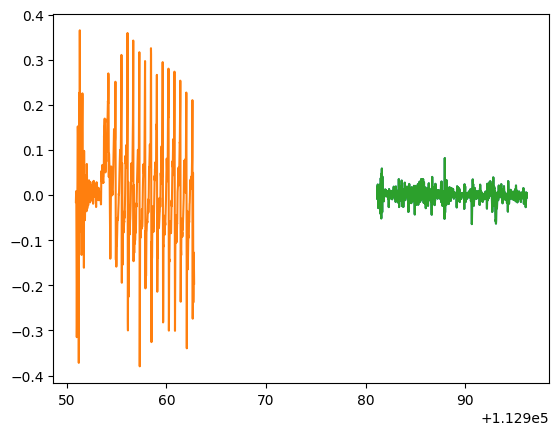

In [ ]:
plt.plot(df_restdevice['timestamp'],df_restdevice["userAcceleration.z"])
plt.plot(df_outdevice['timestamp'],df_outdevice["userAcceleration.z"])
plt.plot(df_returndevice['timestamp'],df_returndevice["userAcceleration.z"])
# plt.plot(single_integration(df_outdevice["userAcceleration.z"], df_outdevice['timestamp']))
# plt.plot(double_integration(df_outdevice["userAcceleration.z"], df_outdevice['timestamp']))
# plt.plot(df_outacc['timestamp'],df_outacc['z'])

array([[ 1.        , -0.06316108],
       [-0.06316108,  1.        ]])

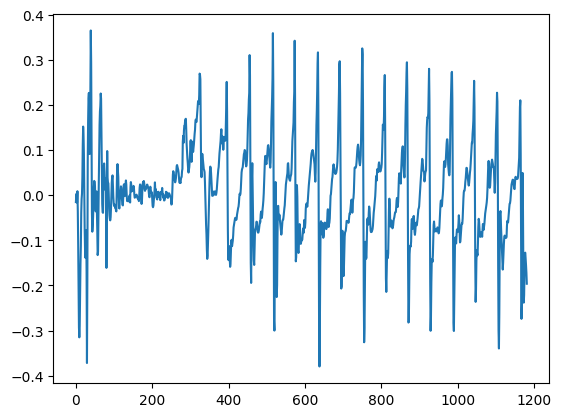

In [ ]:
plt.plot(df_outdevice["userAcceleration.z"])
np.corrcoef(df_outacc["y"],df_outacc["z"])

For the walking test I've begun to start looking at various features in the timeseries data through 3D graphs. I've also made a basic wrapper to do so...

c:\Users\benst\OneDrive\Desktop\Spring2023\Lab\DegenCervicalMyleopathyLab\functions.py:127: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(data[x], data[y], data[z], c=c, cmap='Greens')


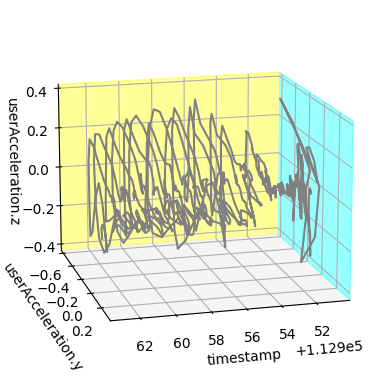

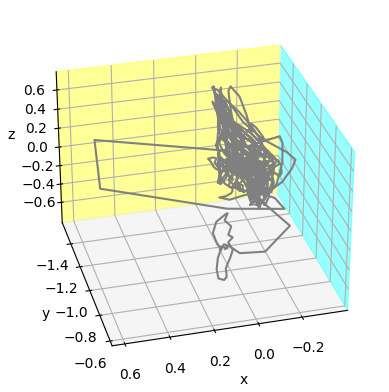

In [ ]:
ThreeDPlot(df_outdevice, 'timestamp', 'userAcceleration.y', 'userAcceleration.z')
ThreeDPlot(df_outacc, 'x', 'y', 'z',  view_angle_x=30)

In [ ]:
max(df_outdevice['timestamp'])-min(df_outdevice['timestamp'])

28.222718749952037

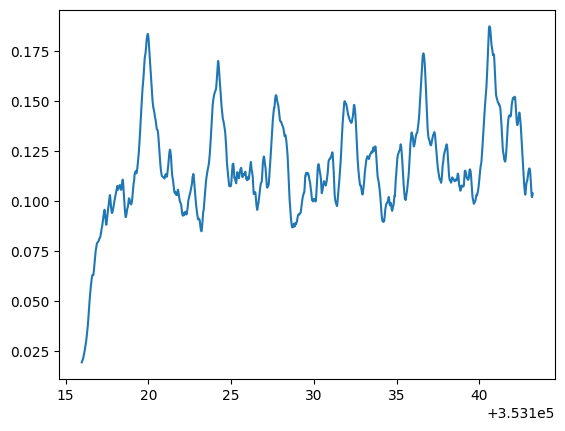

In [ ]:
plt.plot(df_outdevice['timestamp'], pd.Series((df_outdevice['userAcceleration.x']**2+df_outdevice['userAcceleration.y']**2)**(1/2)).rolling(100).mean())

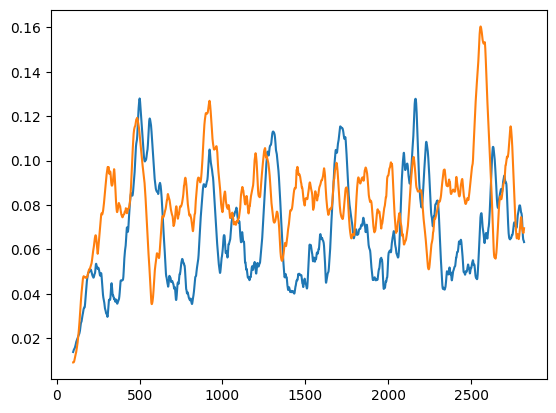

In [ ]:
#+df_outdevice['userAcceleration.z']**2
plt.plot(pd.Series((df_outdevice['userAcceleration.x']**2)**(1/2)).rolling(100).mean())
plt.plot(pd.Series((df_outdevice['userAcceleration.y']**2)**(1/2)).rolling(100).mean())

Here is some exploration for the tapping test... as you can see there seems to be some strange stuff happening here although I'd like to do the test myself to see if this kind of strange data is reproducible.

In [ ]:
def process_tap(summary_data, token):
    for side in ['left', 'right']:
        for field in ['samples', 'stepViewSize', 'buttonRect1', 'buttonRect2']:
            summary_data['tap_'+side+'json.'+field] = (json.loads(summary_data['tap_'+side+'json'])[0].get(field))
        
        # del(summary_data['tap_'+side+'json'])
        # print(pd.json_normalize(summary_data))
        # summary_data['tap_'+side+'accelerometer'] = (f.exportFile(summary_data['participant_id'], 'tap_'+side+'accelerometer', token))
        


    return summary_data

In [ ]:
d = process_tap(cleanTest(oneTypeOfTestForParticipant(4,'tap',token)),token)
print(pd.json_normalize(d))
print(d.keys())
df_tap_leftjson_samples = dictListToDF(d['tap_leftjson.samples'])
df_tap_leftaccelerometer = dictListToDF(d['tap_leftaccelerometer'])
print(df_tap_leftaccelerometer.columns)
plt.scatter(df_tap_leftjson_samples['locationX'],df_tap_leftjson_samples['locationY'])
plt.show()
ThreeDPlot(df_tap_leftaccelerometer, 'x', 'y', 'z', c='timestamp', view_angle_y=30)




                               tap_uuid        tap_startdate  \
0  709325bf-e951-49fb-83f3-8d1944b17818  2023-03-14 12:59:15   

           tap_enddate tap_scheduledate tap_status  \
0  2023-03-14 13:00:28                           1   

                                tap_supplementaldata tap_serializedresult  \
0  {"appversion":"1.12.0_88","configversion":"6",...           result.zip   

                                        tap_leftjson tap_leftaccelerometer  \
0  [{"ButtonRectLeft":"{{214, 1448} {263, 263}}",...                         

                                       tap_rightjson  ... participant_id  \
0  [{"ButtonRectLeft":"{{214, 1448} {263, 263}}",...  ...              4   

  redcap_repeat_instance tap_leftjson.samples  tap_leftjson.stepViewSize  \
0                      1                 None                       None   

  tap_leftjson.buttonRect1 tap_leftjson.buttonRect2 tap_rightjson.samples  \
0                     None                     None                

AttributeError: 'str' object has no attribute 'columns'

The peg test is much simpler in terms of the data. No pulling of zipped files.

In [ ]:
d=cleanTest(oneTypeOfTestForParticipant(5,'peg',token))

In [ ]:
print(d.keys())
d['peg_nondom_place']

dict_keys(['peg_uuid', 'peg_startdate', 'peg_enddate', 'peg_scheduledate', 'peg_status', 'peg_supplementaldata', 'peg_serializedresult', 'peg_dom_place', 'peg_dom_remove', 'peg_nondom_place', 'peg_nondom_remove', 'peg_test_complete', 'participant_id'])


'{"dominantHandTested":"false","movingDirection":"Right","totalDistance":"2323.0948944091797","samples":[{"time":"3.7110564166796394","distance":"241.86631774902344"},{"time":"2.275128624984063","distance":"251.11203002929688"},{"time":"1.824287874973379","distance":"241.75323486328125"},{"time":"2.4766482916893438","distance":"264.37060546875"},{"time":"2.482281458331272","distance":"269.09210205078125"},{"time":"5.399795499979518","distance":"214.89895629882812"},{"time":"2.399718041648157","distance":"278.7796936035156"},{"time":"2.9429723333450966","distance":"283.7906494140625"},{"time":"2.6818896666518413","distance":"277.4313049316406"}],"rotated":"false","numberOfPegs":"9","totalSuccesses":"9","threshold":"0.2","totalTime":"26.205035124999995","totalFailures":"3"}'

... Although its not as simple as the timed walk a.k.a. my favorite test.  Here it looks like there are just three variables, although currently this data shows that the test may be incomplete so would need to redo to be certain.

In [ ]:
d=cleanTest(oneTypeOfTestForParticipant(5,'tim',token))
d.keys()

dict_keys(['tim_uuid', 'tim_startdate', 'tim_enddate', 'tim_scheduledate', 'tim_status', 'tim_supplementaldata', 'tim_serializedresult', 'tim_trial1', 'tim_turnaround', 'tim_trial2', 'timed_walk_complete', 'participant_id'])

In [ ]:
d

{'tim_uuid': 'A3B1C02A-446A-47C4-9F5B-D35D195BDBE0',
 'tim_startdate': '2023-01-15 08:34:10',
 'tim_enddate': '2023-01-15 08:34:56',
 'tim_scheduledate': '',
 'tim_status': '1',
 'tim_supplementaldata': '{\n  "deviceuuid" : "AA59EA11-CF26-450E-80E8-853A62FC9221",\n  "devicemodel" : "iPhone",\n  "percentComplete" : "100",\n  "deviceversion" : "16.0.2",\n  "syncdate" : "2023-01-15 08:34:56",\n  "configversion" : "4",\n  "deviceplatform" : "iOS",\n  "appversion" : "2.20.0",\n  "devicemanufacturer" : "Apple"\n}',
 'tim_serializedresult': 'result.zip',
 'tim_trial1': '14.202383166',
 'tim_turnaround': '3.046138666',
 'tim_trial2': '8.246413415999999',
 'timed_walk_complete': '0',
 'participant_id': '5'}

Tap Test Processing

In [ ]:
tap = cleanTest(oneTypeOfTestForParticipant(4,'tap',token)[1])

In [ ]:
left_samples=pd.json_normalize(json.loads(tap.get('tap_leftjson'))[0].get('TappingSamples'))
left_samples['x']=pd.to_numeric(left_samples['TapCoordinate'].str.split(',').str[0].str[1:])
left_samples['y']=pd.to_numeric(left_samples['TapCoordinate'].str.split(',').str[1].str[:-1])
left_samples['TappedButtonId'][left_samples['TappedButtonId']=='TappedButtonLeft']='L'
left_samples['TappedButtonId'][left_samples['TappedButtonId']=='TappedButtonRight']='R'
left_samples['dist']=0
left_samples.loc[left_samples[left_samples['TappedButtonId']=='R'].index, 'dist'] = ( (left_samples.loc[left_samples[left_samples['TappedButtonId']=='R'].index, 'x']-left_samples.loc[list(left_samples[left_samples['TappedButtonId']=='R'].index)[0], 'x'])**2+(left_samples.loc[left_samples[left_samples['TappedButtonId']=='R'].index, 'y']-left_samples.loc[list(left_samples[left_samples['TappedButtonId']=='R'].index)[0], 'y'])**2 )**.5
left_samples.loc[left_samples[left_samples['TappedButtonId']=='L'].index, 'dist'] = ( (left_samples.loc[left_samples[left_samples['TappedButtonId']=='L'].index, 'x']-left_samples.loc[list(left_samples[left_samples['TappedButtonId']=='L'].index)[0], 'x'])**2+(left_samples.loc[left_samples[left_samples['TappedButtonId']=='L'].index, 'y']-left_samples.loc[list(left_samples[left_samples['TappedButtonId']=='L'].index)[0], 'y'])**2 )**.5

left_samples.head()

C:\Users\benst\AppData\Local\Temp\ipykernel_17708\3164252274.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_samples['TappedButtonId'][left_samples['TappedButtonId']=='TappedButtonLeft']='L'
C:\Users\benst\AppData\Local\Temp\ipykernel_17708\3164252274.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_samples['TappedButtonId'][left_samples['TappedButtonId']=='TappedButtonRight']='R'


,TappedButtonId,duration,TapCoordinate,TapTimeStamp,x,y,dist
0,L,42656636,"{257, 1537}",42656636,257,1537,0.000000
1,R,42656936,"{689, 1604}",-1678861572741,689,1604,0.000000
2,L,42657236,"{320, 1532}",-1678861572441,320,1532,63.198101
3,R,42657412,"{670, 1577}",-1678861572265,670,1577,33.015148
4,L,42657729,"{363, 1494}",-1678861571948,363,1494,114.389685


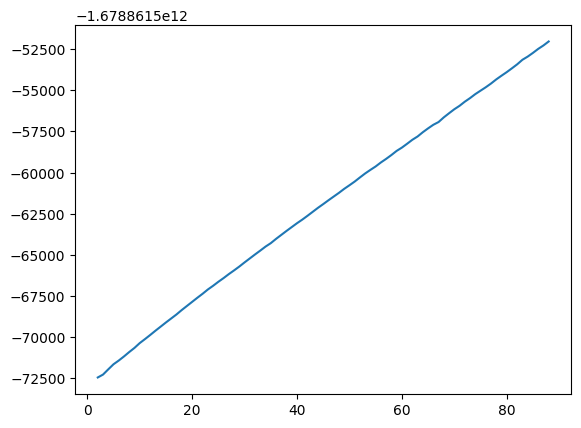

In [ ]:
plt.plot(left_samples['TapTimeStamp'][2:])


In [2]:
def process_tap(cleanedTapData, prints=True, plots=False):
    if type(cleanedTapData)==list:
        data=[]
        for i in range(len(cleanedTapData)):
            data.append(process_tap(cleanedTapData[i], prints=False, plots=plots))
        data=pd.json_normalize(data)
        data['test_time']=pd.to_datetime(data['test_time'])
        return data

    else:
        ##PART ONE, NORMALIZE ANDROID AND iOS
        tap=cleanedTapData
        participant_id=(tap['participant_id'])
        test_time=tap['tap_startdate']
        if type(eval(tap['tap_leftjson']))==list: #android
            left_hand_samples=pd.json_normalize(eval(tap['tap_leftjson'])[0]['TappingSamples']).rename(columns={"TappedButtonId":"ButtonId"})
            left_hand_samples['TapCoordinate']=left_hand_samples['TapCoordinate'].str[1:-1].str.split(', ')
            left_hand_samples['X']=pd.to_numeric(left_hand_samples['TapCoordinate'].str[0])
            left_hand_samples['Y']=pd.to_numeric(left_hand_samples['TapCoordinate'].str[1])
            left_hand_samples['timestamp']=(left_hand_samples['duration']-min(left_hand_samples['duration']))/1000
            left_hand_samples['ButtonId']=left_hand_samples['ButtonId'].str.replace('TappedButton','')
            left_hand_samples=left_hand_samples.drop(columns=['duration', 'TapCoordinate', 'TapTimeStamp'])

            right_hand_samples=pd.json_normalize(eval(tap['tap_rightjson'])[0]['TappingSamples']).rename(columns={"TappedButtonId":"ButtonId"})
            right_hand_samples['TapCoordinate']=right_hand_samples['TapCoordinate'].str[1:-1].str.split(', ')
            right_hand_samples['X']=pd.to_numeric(right_hand_samples['TapCoordinate'].str[0])
            right_hand_samples['Y']=pd.to_numeric(right_hand_samples['TapCoordinate'].str[1])
            right_hand_samples['timestamp']=(right_hand_samples['duration']-min(right_hand_samples['duration']))/1000
            right_hand_samples['ButtonId']=right_hand_samples['ButtonId'].str.replace('TappedButton','')
            right_hand_samples=right_hand_samples.drop(columns=['duration', 'TapCoordinate', 'TapTimeStamp'])

            

            e=eval(tap['tap_leftjson'])[0]
            screen_size_x=float(e['TappingViewSize'][1:-1].split(', ')[0])
            screen_size_y=float(e['TappingViewSize'][1:-1].split(', ')[1])
            
            left_button_height=float(e['ButtonRectLeft'].split('} {')[-1][:-2].split(', ')[-1])
            left_button_width=float(e['ButtonRectLeft'].split('} {')[-1][:-2].split(', ')[0])
            left_button_midpointX=float(e['ButtonRectLeft'][2:].split(', ')[0])+(left_button_width/2)
            left_button_midpointY=float(e['ButtonRectLeft'][2:].split(', ')[1].split('}')[0])+(left_button_height/2)

            right_button_height=float(e['ButtonRectRight'].split('} {')[-1][:-2].split(', ')[-1])
            right_button_width=float(e['ButtonRectRight'].split('} {')[-1][:-2].split(', ')[0])
            right_button_midpointX=float(e['ButtonRectRight'][2:].split(', ')[0])+(right_button_width/2)
            right_button_midpointY=float(e['ButtonRectRight'][2:].split(', ')[1].split('}')[0])+(right_button_height/2)


        else: #apple
            
            left_hand_samples=pd.json_normalize(eval(tap['tap_leftjson'])['samples']).rename(columns={"buttonIdentifier":"ButtonId",'locationY':'Y','locationX':'X'})
            left_hand_samples['ButtonId']=left_hand_samples['ButtonId'].str[1:]
            left_hand_samples['X']=pd.to_numeric(left_hand_samples['X'])
            left_hand_samples['Y']=pd.to_numeric(left_hand_samples['Y'])
            left_hand_samples['timestamp']=pd.to_numeric(left_hand_samples['timestamp'])
            right_hand_samples=pd.json_normalize(eval(tap['tap_rightjson'])['samples']).rename(columns={"buttonIdentifier":"ButtonId",'locationY':'Y','locationX':'X'})
            right_hand_samples['ButtonId']=right_hand_samples['ButtonId'].str[1:]
            right_hand_samples['X']=pd.to_numeric(right_hand_samples['X'])
            right_hand_samples['Y']=pd.to_numeric(right_hand_samples['Y'])
            right_hand_samples['timestamp']=pd.to_numeric(right_hand_samples['timestamp'])

            e=eval(tap['tap_leftjson'])
            screen_size_x=float(e['stepViewSize'].get('width'))
            screen_size_y=float(e['stepViewSize'].get('height'))

            left_button_height=float(e['buttonRect1'].get('height'))
            left_button_width=float(e['buttonRect1'].get('width'))
            left_button_midpointX=float(e['buttonRect1'].get('locationX'))+(left_button_width/2)
            left_button_midpointY=float(e['buttonRect1'].get('locationY'))+(left_button_height/2)

            right_button_height=float(e['buttonRect2'].get('height'))
            right_button_width=float(e['buttonRect2'].get('width'))
            right_button_midpointX=float(e['buttonRect2'].get('locationX'))+(right_button_width/2)
            right_button_midpointY=float(e['buttonRect2'].get('locationY'))+(right_button_height/2)

        #PART TWO, COMPUTE OUT STATISTICS

        data={'participant_id':participant_id,'test_time':test_time}

        print_out=""

        #notes:
        #right will always be positive for asymetry. for example if on the left hand the finger precisions are right:50, left:60, 
        #the precision score for the left hand is 55 and the asymetry score for the left hand is 10 (positive because right is better)

        #helpers
        left_finger_left_hand=left_hand_samples[left_hand_samples['ButtonId']=='Left']
        right_finger_left_hand=left_hand_samples[left_hand_samples['ButtonId']=='Right']
        left_finger_right_hand=right_hand_samples[right_hand_samples['ButtonId']=='Left']
        right_finger_right_hand=right_hand_samples[right_hand_samples['ButtonId']=='Right']
        location_precision_modifier=100/np.mean([left_button_width,right_button_width])



        #precision #average euclidean distance between each tap and mean tap
        precision_left_finger_left_hand=np.mean(((left_finger_left_hand['X']-np.mean(left_finger_left_hand['X']))**2+(left_finger_left_hand['Y']-np.mean(left_finger_left_hand['Y']))**2)**.5)*location_precision_modifier
        precision_right_finger_left_hand=np.mean(((right_finger_left_hand['X']-np.mean(right_finger_left_hand['X']))**2+(right_finger_left_hand['Y']-np.mean(right_finger_left_hand['Y']))**2)**.5)*location_precision_modifier
        precision_left_finger_right_hand=np.mean(((left_finger_right_hand['X']-np.mean(left_finger_right_hand['X']))**2+(left_finger_right_hand['Y']-np.mean(left_finger_right_hand['Y']))**2)**.5)*location_precision_modifier
        precision_right_finger_right_hand=np.mean(((right_finger_right_hand['X']-np.mean(right_finger_right_hand['X']))**2+(right_finger_right_hand['Y']-np.mean(right_finger_right_hand['Y']))**2)**.5)*location_precision_modifier
        left_hand_precision=np.mean([precision_left_finger_left_hand,precision_right_finger_left_hand])
        right_hand_precision=np.mean([precision_left_finger_right_hand,precision_right_finger_right_hand])
        left_hand_precision_asym=precision_right_finger_left_hand-precision_left_finger_left_hand
        right_hand_precision_asym=precision_right_finger_right_hand-precision_left_finger_right_hand

        print_out=print_out+'\n'+("LEFT HAND PRECISION: "+str(left_hand_precision)); data['left_hand_precision']=left_hand_precision
        print_out=print_out+'\n'+("RIGHT HAND PRECISION: "+str(right_hand_precision)); data['right_hand_precision']=right_hand_precision
        print_out=print_out+'\n'+("LEFT HAND PRECISION FINGER ASYMETRY: "+str(left_hand_precision_asym)); data['left_hand_precision_asym']=left_hand_precision_asym
        print_out=print_out+'\n'+("RIGHT HAND PRECISION FINGER ASYMETRY: "+str(right_hand_precision_asym)); data['right_hand_precision_asym']=right_hand_precision_asym
        print_out=print_out+'\n'

        #accuracy: #percentage of taps within the inner 95% of circle
        accuracy_modifier=1
        accuracy_left_finger_left_hand=1-(((((left_finger_left_hand['X']-left_button_midpointX)**2+(left_finger_left_hand['Y']-left_button_midpointY)**2)**.5)>(left_button_width/2)*accuracy_modifier).sum()/len(left_finger_left_hand))
        accuracy_right_finger_left_hand=1-(((((right_finger_left_hand['X']-right_button_midpointX)**2+(right_finger_left_hand['Y']-right_button_midpointY)**2)**.5)>(right_button_width/2)*accuracy_modifier).sum()/len(right_finger_right_hand))
        accuracy_left_finger_right_hand=1-(((((left_finger_right_hand['X']-left_button_midpointX)**2+(left_finger_right_hand['Y']-left_button_midpointY)**2)**.5)>(left_button_width/2)*accuracy_modifier).sum()/len(left_finger_left_hand))
        accuracy_right_finger_right_hand=1-(((((right_finger_right_hand['X']-right_button_midpointX)**2+(right_finger_right_hand['Y']-right_button_midpointY)**2)**.5)>(right_button_width/2)*accuracy_modifier).sum()/len(right_finger_right_hand))
        left_hand_accuracy=np.mean([accuracy_left_finger_left_hand,accuracy_right_finger_left_hand])
        right_hand_accuracy=np.mean([accuracy_left_finger_right_hand,accuracy_right_finger_right_hand])
        left_hand_accuracy_asym=accuracy_right_finger_left_hand-accuracy_left_finger_left_hand
        right_hand_accuracy_asym=accuracy_right_finger_right_hand-accuracy_left_finger_right_hand

        print_out=print_out+'\n'+("LEFT HAND ACCURACY: "+str(left_hand_accuracy)); data['left_hand_accuracy']=left_hand_accuracy
        print_out=print_out+'\n'+("RIGHT HAND ACCURACY: "+str(right_hand_accuracy)); data['right_hand_accuracy']=right_hand_accuracy
        print_out=print_out+'\n'+("LEFT HAND ACCURACY FINGER ASYMETRY: "+str(left_hand_accuracy_asym)); data['left_hand_accuracy_asym']=left_hand_accuracy_asym
        print_out=print_out+'\n'+("RIGHT HAND ACCURACY FINGER ASYMETRY: "+str(right_hand_accuracy_asym)); data['right_hand_accuracy_asym']=right_hand_accuracy_asym
        print_out=print_out+'\n'

        #speed #average number of taps per second
        left_hand_speed=1/np.mean(left_hand_samples['timestamp']-left_hand_samples['timestamp'].shift(1))
        right_hand_speed=1/np.mean(right_hand_samples['timestamp']-right_hand_samples['timestamp'].shift(1))

        print_out=print_out+'\n'+("LEFT HAND SPEED: "+str(left_hand_speed)); data['left_hand_speed']=left_hand_speed
        print_out=print_out+'\n'+("RIGHT HAND SPEED: "+str(right_hand_speed)); data['right_hand_speed']=right_hand_speed
        print_out=print_out+'\n'
        
        #stamina #coefficient of linear regression using times in between taps
        left_hand_stamina=(LinearRegression().fit(np.array(list(left_hand_samples.index)[2:-5]).reshape(-1, 1),1000*(left_hand_samples.loc[list(left_hand_samples.index)[1:-5],'timestamp']-left_hand_samples.loc[list(left_hand_samples.index)[1:-5],'timestamp'].shift(1)).dropna())).coef_[0]
        right_hand_stamina=(LinearRegression().fit(np.array(list(right_hand_samples.index)[2:-5]).reshape(-1, 1),1000*(right_hand_samples.loc[list(right_hand_samples.index)[1:-5],'timestamp']-right_hand_samples.loc[list(right_hand_samples.index)[1:-5],'timestamp'].shift(1)).dropna())).coef_[0]

        print_out=print_out+'\n'+("LEFT HAND STAMINA: "+str(left_hand_stamina)); data['left_hand_stamina']=left_hand_stamina
        print_out=print_out+'\n'+("RIGHT HAND STAMINA: "+str(right_hand_stamina)); data['right_hand_stamina']=right_hand_stamina
        print_out=print_out+'\n'

        #double_taps #number of times user taps the same button twice instead of alternating
        left_hand_double_taps=((left_hand_samples['ButtonId'])==(left_hand_samples['ButtonId'].shift(1))).value_counts().get(True,default=0)
        right_hand_double_taps=((right_hand_samples['ButtonId'])==(right_hand_samples['ButtonId'].shift(1))).value_counts().get(True,default=0)
        print_out=print_out+'\n'+("LEFT HAND DOUBLE TAPS: "+str(left_hand_double_taps)); data['left_hand_double_taps']=left_hand_double_taps
        print_out=print_out+'\n'+("RIGHT HAND DOUBLE TAPS: "+str(right_hand_double_taps)); data['right_hand_double_taps']=right_hand_double_taps
        print_out=print_out+'\n'

        #distance_between_taps_over_time
        
        left_finger_left_hand_distance_between_taps_over_time=(LinearRegression().fit(np.array(list(left_finger_left_hand.index)[1:-1]).reshape(-1, 1),((((left_finger_left_hand['X']-left_finger_left_hand['X'].shift(1))**2 + (left_finger_left_hand['Y']-left_finger_left_hand['Y'].shift(1))**2)**.5).iloc[1:-1]))).coef_[0]
        right_finger_left_hand_distance_between_taps_over_time=(LinearRegression().fit(np.array(list(left_finger_right_hand.index)[1:-1]).reshape(-1, 1),((((left_finger_right_hand['X']-left_finger_right_hand['X'].shift(1))**2 + (left_finger_right_hand['Y']-left_finger_right_hand['Y'].shift(1))**2)**.5).iloc[1:-1]))).coef_[0]
        left_finger_right_hand_distance_between_taps_over_time=(LinearRegression().fit(np.array(list(left_finger_right_hand.index)[1:-1]).reshape(-1, 1),((((left_finger_right_hand['X']-left_finger_right_hand['X'].shift(1))**2 + (left_finger_right_hand['Y']-left_finger_right_hand['Y'].shift(1))**2)**.5).iloc[1:-1]))).coef_[0]
        right_finger_right_hand_distance_between_taps_over_time=(LinearRegression().fit(np.array(list(right_finger_right_hand.index)[1:-1]).reshape(-1, 1),((((right_finger_right_hand['X']-right_finger_right_hand['X'].shift(1))**2 + (right_finger_right_hand['Y']-right_finger_right_hand['Y'].shift(1))**2)**.5).iloc[1:-1]))).coef_[0]
        left_hand_distance_between_taps_over_time=np.mean([left_finger_left_hand_distance_between_taps_over_time,right_finger_left_hand_distance_between_taps_over_time])
        right_hand_distance_between_taps_over_time=np.mean([left_finger_right_hand_distance_between_taps_over_time,right_finger_right_hand_distance_between_taps_over_time])
        
        print_out=print_out+'\n'+("LEFT HAND DISTANCE BTWN TAPS OVER TIME: "+str(left_hand_distance_between_taps_over_time)); data['left_hand_distance_between_taps_over_time']=left_hand_distance_between_taps_over_time
        print_out=print_out+'\n'+("RIGHT HAND DISTANCE BTWN TAPS OVER TIME: "+str(right_hand_distance_between_taps_over_time)); data['right_hand_distance_between_taps_over_time']=right_hand_distance_between_taps_over_time
        print_out=print_out+'\n'

        #heteroskedasticity regession
        left_hand_time_abs_residuals=np.abs(1000*(left_hand_samples.loc[list(left_hand_samples.index)[1:-5],'timestamp']-left_hand_samples.loc[list(left_hand_samples.index)[1:-5],'timestamp'].shift(1)).dropna()-(LinearRegression().fit(np.array(list(left_hand_samples.index)[2:-5]).reshape(-1, 1),1000*(left_hand_samples.loc[list(left_hand_samples.index)[1:-5],'timestamp']-left_hand_samples.loc[list(left_hand_samples.index)[1:-5],'timestamp'].shift(1)).dropna())).predict(np.array(list(left_hand_samples.index)[2:-5]).reshape(-1, 1)))
        left_hand_heteroskedasticity=(LinearRegression().fit(np.array(list(left_hand_samples.index)[2:-5]).reshape(-1, 1),left_hand_time_abs_residuals)).coef_[0]
        right_hand_time_abs_residuals=np.abs(1000*(right_hand_samples.loc[list(right_hand_samples.index)[1:-5],'timestamp']-right_hand_samples.loc[list(right_hand_samples.index)[1:-5],'timestamp'].shift(1)).dropna()-(LinearRegression().fit(np.array(list(right_hand_samples.index)[2:-5]).reshape(-1, 1),1000*(right_hand_samples.loc[list(right_hand_samples.index)[1:-5],'timestamp']-right_hand_samples.loc[list(right_hand_samples.index)[1:-5],'timestamp'].shift(1)).dropna())).predict(np.array(list(right_hand_samples.index)[2:-5]).reshape(-1, 1)))
        right_hand_heteroskedasticity=(LinearRegression().fit(np.array(list(right_hand_samples.index)[2:-5]).reshape(-1, 1),right_hand_time_abs_residuals)).coef_[0]
        print_out=print_out+'\n'+("LEFT HAND TIME HETEROSKEDASTICITY: "+str(left_hand_heteroskedasticity)); data['left_hand_heteroskedasticity']=left_hand_heteroskedasticity
        print_out=print_out+'\n'+("RIGHT HAND TIME HETEROSKEDASTICIT: "+str(right_hand_heteroskedasticity)); data['right_hand_heteroskedasticity']=right_hand_heteroskedasticity
        print_out=print_out+'\n'


        #steadiness #score from 0-100 with 100 being the best which looks to combine jumpiness/variability of placement of taps with tap in between taps
        left_hand_steadiness=100-(left_hand_precision-5)*2-((np.std(1000*(left_hand_samples.loc[list(left_hand_samples.index)[1:-5],'timestamp']-left_hand_samples.loc[list(left_hand_samples.index)[1:-5],'timestamp'].shift(1)).dropna()))**.5)-left_hand_double_taps**.5
        right_hand_steadiness=100-(right_hand_precision-5)*2-((np.std(1000*(right_hand_samples.loc[list(right_hand_samples.index)[1:-5],'timestamp']-right_hand_samples.loc[list(right_hand_samples.index)[1:-5],'timestamp'].shift(1)).dropna()))**.5)-right_hand_double_taps**.5
        print_out=print_out+'\n'+("LEFT HAND STEADINESS: "+str(left_hand_steadiness)); data['left_hand_steadiness']=left_hand_steadiness
        print_out=print_out+'\n'+("RIGHT HAND STEADINESS: "+str(right_hand_steadiness)); data['right_hand_steadiness']=right_hand_steadiness
        print_out=print_out+'\n'



        # plt.plot(1000*(left_hand_samples.loc[list(left_hand_samples.index)[1:-5],'timestamp']-left_hand_samples.loc[list(left_hand_samples.index)[1:-5],'timestamp'].shift(1)).dropna())
        # plt.plot(1000*(right_hand_samples.loc[list(right_hand_samples.index)[1:-5],'timestamp']-right_hand_samples.loc[list(right_hand_samples.index)[1:-5],'timestamp'].shift(1)).dropna())
        # plt.show()
        if plots==True:
            fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 3))  
            axes[0].plot(left_finger_left_hand['X'],left_finger_left_hand['Y'])
            axes[0].plot(right_finger_left_hand['X'],right_finger_left_hand['Y'])
            theta = np.linspace( 0 , 2 * np.pi , 150 )
            radius = left_button_width/2
            a = radius * np.cos( theta )
            b = radius * np.sin( theta )
            axes[0].plot(left_button_midpointX + a,left_button_midpointY + b)
            axes[0].plot(right_button_midpointX + a,right_button_midpointY + b)
            axes[0].set_title('Left Hand')

            axes[2].plot(left_finger_right_hand['X'],left_finger_right_hand['Y'])
            axes[2].plot(right_finger_right_hand['X'],right_finger_right_hand['Y'])
            theta = np.linspace( 0 , 2 * np.pi , 150 )
            radius = left_button_width/2
            a = radius * np.cos( theta )
            b = radius * np.sin( theta )
            axes[2].plot(left_button_midpointX + a,left_button_midpointY + b)
            axes[2].plot(right_button_midpointX + a,right_button_midpointY + b)
            axes[2].set_title('Right Hand')

            axes[1].plot(1000*(left_hand_samples.loc[list(left_hand_samples.index)[1:-5],'timestamp']-left_hand_samples.loc[list(left_hand_samples.index)[1:-5],'timestamp'].shift(1)).dropna())
            axes[1].set_title('Left Hand Time Between Taps')
            
            axes[3].plot(1000*(right_hand_samples.loc[list(right_hand_samples.index)[1:-5],'timestamp']-right_hand_samples.loc[list(right_hand_samples.index)[1:-5],'timestamp'].shift(1)).dropna())
            axes[3].set_title('Right Hand Time Between Taps')

            fig.tight_layout()
            plt.show()

        return data


In [3]:
def allOfOneTypeOfTest2(test, token): #returns list of test objects of the same kind of test
    data = {
        'fields[0]': 'participant_id',
        "forms": test_mapping.get(test.lower()),
        }
    d = executeRequest(data, token)
    tests = []
    for t in d:
        if t.get('redcap_repeat_instrument')==test_mapping.get(test.lower()):
            tests.append(t)
    return tests

In [65]:
def process_peg(cleanedPegData):
    if type(cleanedPegData)==list:
        data=[]
        for i in range(len(cleanedPegData)):
            data.append(process_peg(cleanedPegData[i]))
        data=pd.json_normalize(data)
        data['test_time']=pd.to_datetime(data['test_time'])
        return data
    else:
        peg=cleanedPegData
        participant_id=peg['participant_id']
        redcap_repeat_instance=peg['redcap_repeat_instance']
        test_time=peg['peg_startdate']

        data={
            'participant_id':participant_id,
            'redcap_repeat_instance':redcap_repeat_instance,
            'test_time':test_time
        }

        partitions=['peg_dom_place', 'peg_dom_remove', 'peg_nondom_place', 'peg_nondom_remove']
        failuress=[]
        time_deviations=[]
        for i in partitions:
            failures=int(eval(peg.get(i)).get('totalFailures'));failuress.append(failures)
            samples=pd.json_normalize(eval(peg.get(i)).get('samples'))
            time_deviation=np.std(pd.to_numeric(samples['time']));time_deviations.append(time_deviation)

            data[i+'_failures']=failures
            data[i+'_time_deviation']=time_deviation
            
        data['average_failures']=np.mean(failuress)
        data['average_time_deviations']=np.mean(time_deviations)

        data['dom_preference_failures']=(data['peg_dom_place_failures']+data['peg_dom_remove_failures']-data['peg_nondom_place_failures']-data['peg_nondom_remove_failures'])/2
        data['dom_preference_time_deviation']=(data['peg_dom_place_time_deviation']+data['peg_dom_remove_time_deviation']-data['peg_nondom_place_time_deviation']-data['peg_nondom_remove_time_deviation'])/2




        return data

In [66]:
d=cleanTests(allOfOneTypeOfTest('peg',token))
process_peg(d)

,participant_id,redcap_repeat_instance,test_time,peg_dom_place_failures,peg_dom_place_time_deviation,peg_dom_remove_failures,peg_dom_remove_time_deviation,peg_nondom_place_failures,peg_nondom_place_time_deviation,peg_nondom_remove_failures,peg_nondom_remove_time_deviation,average_failures,average_time_deviations
0,6,1,2023-04-29 13:23:17,1,0.736048,0,1.082090,6,1.372345,8,0.959623,3.75,1.037526
1,8,1,2023-04-30 14:01:31,3,1.777804,4,3.179321,0,2.555837,5,2.935940,3.00,2.612225
2,11,1,2023-06-19 10:37:01,1,0.493153,0,0.874959,3,0.901425,0,0.164457,1.00,0.608499
